In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [47]:
segments_df = pd.read_csv("../../data/Raw-GPS-data-Kandy-Buses/MAIN/OUTPUTS/merged_segements_10T.csv")

In [48]:
segments_df = segments_df.dropna()

In [49]:
segments_df[segments_df.isnull().any(axis=1)]

,segment_starting_time,segment_ending_time,trip_id,deviceid,date,start_terminal,end_terminal,direction,day_of_week,hour_of_day,...,max_speed,speed_variation,elevation_p,elevation_n,ele_X_speed_acc_p,ele_X_speed_acc_n,average_acceleration,average_deacceleration,std_acc_dacc,stop_count


In [60]:
selected_features = ['std_acc_dacc', 'speed_variation', 'elevation_n', 'ele_X_speed_acc_p', 'ele_X_speed_acc_n', 'average_acceleration', 'average_deacceleration','stop_count',	'average_speed', 'max_speed']
features = segments_df[selected_features]
features = features.values

In [61]:
# normalize the values
scaler = StandardScaler()

features = scaler.fit_transform(features)

In [62]:
# Apply PCA
num_components = 2 
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(features)

In [15]:
# Apply PCA
num_components = 2 
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(features)

for i in range(2,10):
    num_components = i
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(features)

    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained Variance Ratio:     sum: {sum(explained_variance_ratio)}     no_componets: {len(explained_variance_ratio)}")

Explained Variance Ratio:     sum: 0.5887885299736298     no_componets: 2
Explained Variance Ratio:     sum: 0.7670694819949733     no_componets: 3
Explained Variance Ratio:     sum: 0.8533635993128796     no_componets: 4
Explained Variance Ratio:     sum: 0.9061993557990248     no_componets: 5
Explained Variance Ratio:     sum: 0.9527618316801977     no_componets: 6
Explained Variance Ratio:     sum: 0.9691332909330808     no_componets: 7
Explained Variance Ratio:     sum: 0.9822915268263676     no_componets: 8
Explained Variance Ratio:     sum: 0.9938578468472649     no_componets: 9


In [63]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print(sum(explained_variance_ratio))

Explained Variance Ratio: [0.38890043 0.1998881 ]
0.5887885299736315


In [15]:
X_pca = X_pca[(X_pca[:,0]<10) & (X_pca[:,1]<10)]

In [64]:

# Fit Gaussian Mixture Model
n_components = 3  # Number of clusters/components
# gmm = GaussianMixture(n_components=n_components)
# gmm.fit(X_pca)

# # Predict cluster labels
# labels = gmm.predict(X_pca)

kmeans = KMeans(n_clusters=n_components,init='k-means++', n_init = 10, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

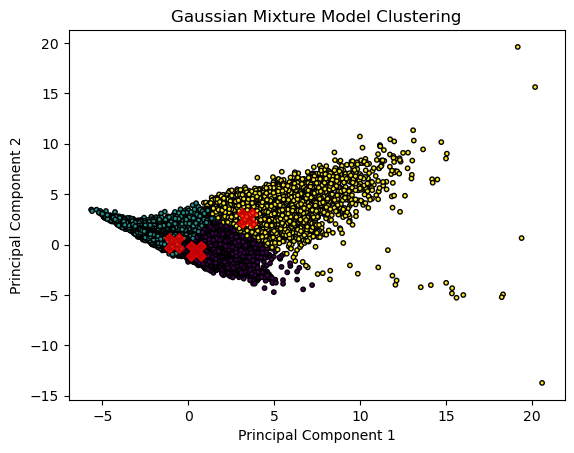

In [55]:
# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40, edgecolors='k', marker='.')

# Plot the means of the Gaussian components
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [56]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)

print(f"For k={n_components}, Silhouette Score: {silhouette_avg}")

For k=3, Silhouette Score: 0.499293247150687


In [58]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)

print(f"For k={n_components}, Davies-Bouldin Index: {db_index}")

For k=3, Davies-Bouldin Index: 0.6287006992552784


In [27]:
# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_pca, labels)

print(f"For k={n_components}, Calinski-Harabasz Index: {ch_index}")

For k=3, Calinski-Harabasz Index: 72199.47726646357


In [65]:

original_features = np.random.rand(100, 5)  # Replace with your original features
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

# Combine data into a DataFrame
data = pd.DataFrame(np.column_stack([features, pc1, pc2]), columns=selected_features+ ['PC1', 'PC2'])

# Calculate correlations
correlations_pc1 = data.corr()['PC1'][:-2]  # Exclude PC1 and PC2 from the result
correlations_pc2 = data.corr()['PC2'][:-2]  # Exclude PC1 and PC2 from the result

# Combine correlations into a table
correlation_table = pd.DataFrame({
    'Original Feature': correlations_pc1.index,
    'Correlation with PC1': correlations_pc1.values,
    'Correlation with PC2': correlations_pc2.values
})

# Print or display the correlation table
print(correlation_table)


         Original Feature  Correlation with PC1  Correlation with PC2
0            std_acc_dacc              0.805354             -0.012272
1         speed_variation              0.787371             -0.492047
2             elevation_n              0.068030             -0.487125
3       ele_X_speed_acc_p              0.398725              0.748448
4       ele_X_speed_acc_n              0.417966              0.759547
5    average_acceleration              0.710455              0.344415
6  average_deacceleration             -0.769779              0.064156
7              stop_count              0.317866              0.245571
8           average_speed              0.653582             -0.331565
9               max_speed              0.810330             -0.298773


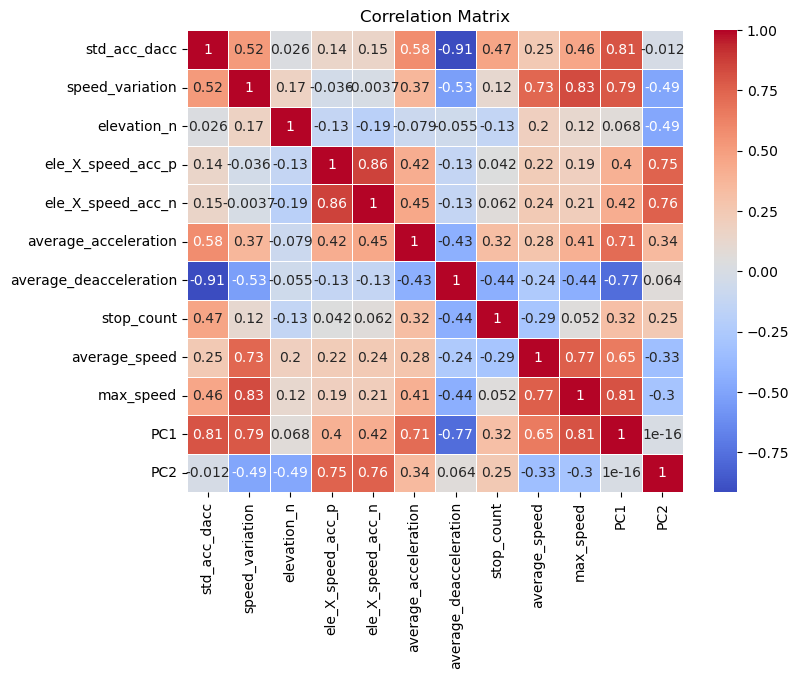

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# std_acc_dacc, speed_variation, ale_X_speed_acc_P
Halana # average_deaccelaration, average_speed, max_speed, elevation_n, 

In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = X_pca
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


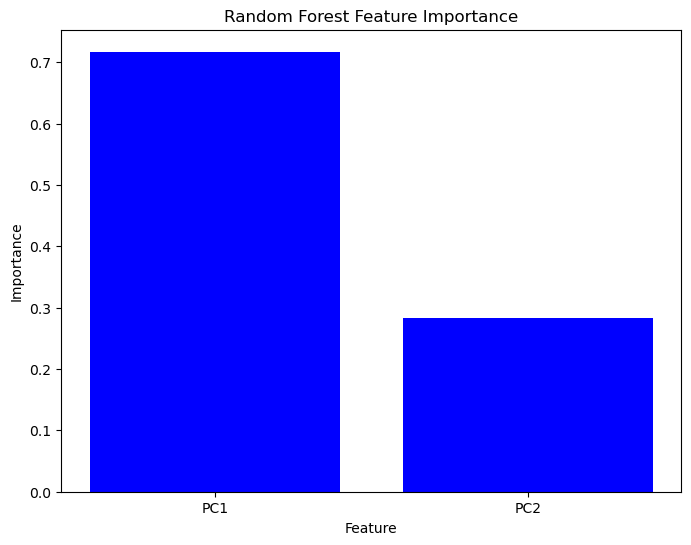

In [39]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar( ['PC1','PC2'], feature_importances, color='blue')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For k=2, Silhouette Score: 0.5902182019276141
For k=2, Davies-Bouldin Index: 0.5246922896026683


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For k=3, Silhouette Score: 0.7569108532473462
For k=3, Davies-Bouldin Index: 0.35599464751937987


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For k=4, Silhouette Score: 0.7915830011443039
For k=4, Davies-Bouldin Index: 0.2905354431615246


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For k=5, Silhouette Score: 0.6890369421581084
For k=5, Davies-Bouldin Index: 0.5741923122709471


c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\manda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


For k=6, Silhouette Score: 0.5594312134249396
For k=6, Davies-Bouldin Index: 0.8427807774587843


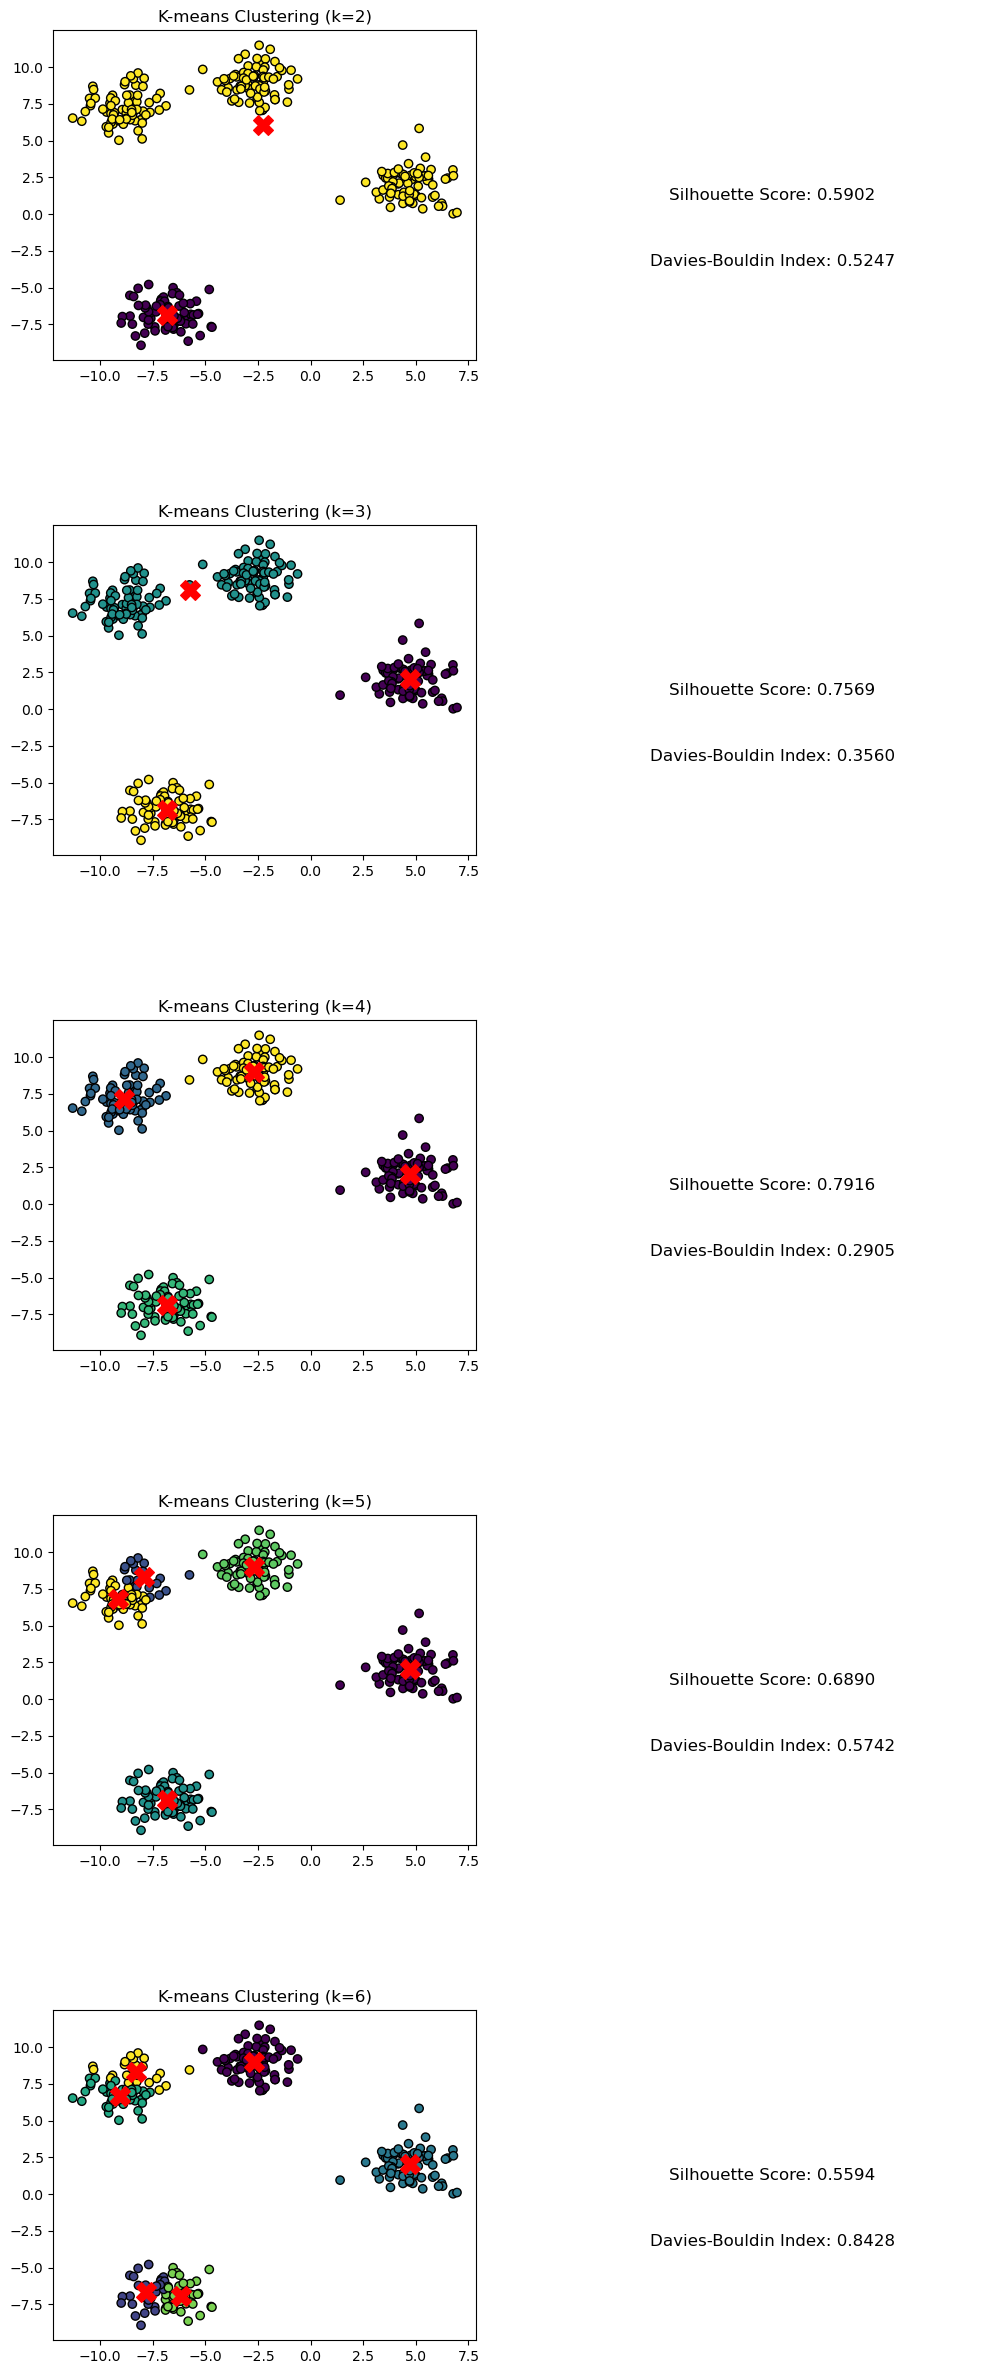

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration purposes
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Specify the range of k values (number of clusters) to evaluate
k_values = [2, 3, 4, 5, 6]

# Initialize subplots
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 30))
fig.subplots_adjust(hspace=0.5)

# Iterate over different k values
for i, k in enumerate(k_values):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X, cluster_labels)
    print(f"For k={k}, Davies-Bouldin Index: {db_index}")

    # Plot clusters
    axes[i, 0].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
    axes[i, 0].set_title(f'K-means Clustering (k={k})')

    # Highlight cluster centers
    axes[i, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')

    # Plot Silhouette Scores
    axes[i, 1].text(0.5, 0.5, f'Silhouette Score: {silhouette_avg:.4f}', ha='center', va='center', fontsize=12)
    axes[i, 1].text(0.5, 0.3, f'Davies-Bouldin Index: {db_index:.4f}', ha='center', va='center', fontsize=12)
    axes[i, 1].axis('off')

plt.show()
